In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Loading the dataset

In [2]:
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(x_train.shape,y_train.shape) # 60,000 images of 28x28 size
print(x_test.shape,y_test.shape) # 10,000 labels

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


# Checking an example of a feature for each category

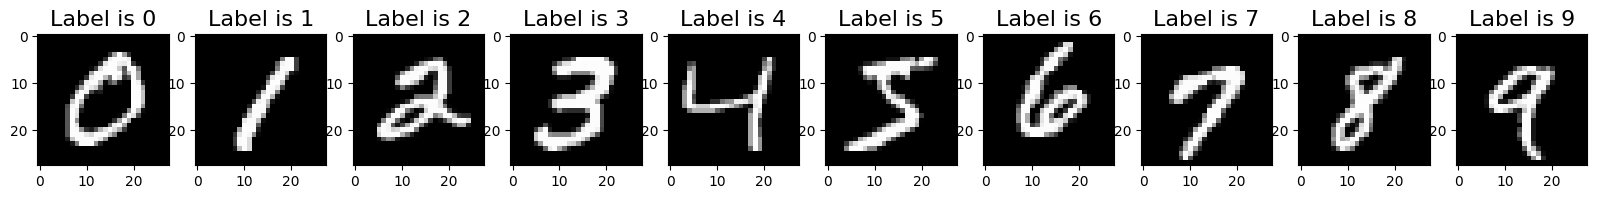

In [3]:
categories = 10
f, ax = plt.subplots(1, categories, figsize=(20,20))

for i in range(0,categories):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap = 'gray')
  ax[i].set_title("Label is {}".format(i), fontsize = 16)

#Preprocessing

In [4]:
 # Normalizing the data (Dividing by 255 to give each pixel a value from 0 to 1)
x_train = x_train/255.0
x_test = x_test/255.0

 # Reshape x dataset so the 2d image is transformed into a 1d vector
x_train = x_train.reshape(x_train.shape[0],-1)
x_test = x_test.reshape(x_test.shape[0],-1)
print(x_train.shape)

(60000, 784)


#Creating the model

In [5]:
tf.random.set_seed(1234)

# Creating model using SparseCateogricalCrossentropy
model = tf.keras.models.Sequential([
    tf.keras.Input(shape=(784,)),
    tf.keras.layers.Dense(25,activation = 'relu', name = 'L1'),
    tf.keras.layers.Dense(15,activation = 'relu', name = 'L2'),
    tf.keras.layers.Dense(10,activation = 'linear', name = 'L3')
], name = "MNIST_model")

# Optimizer is Adam to have varying learning rate. Loss is sparsecategoricalcrossentropy for softmax. Metric used for future analysis
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

#Fitting model and running through it 10 times
model.fit(x_train,y_train, epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 4ms/step - accuracy: 0.8069 - loss: 0.6499
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9364 - loss: 0.2159
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9476 - loss: 0.1739
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9549 - loss: 0.1492
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9603 - loss: 0.1317
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9637 - loss: 0.1189
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9673 - loss: 0.1086
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9696 - loss: 0.1000
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9720 - loss: 0.0931
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9733 - loss: 0.0875


#Checking data

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
 predicting a seven: 
[[ -6.9751954   -8.2572775   -2.339298     6.4665165   -8.640974
  -10.145146   -28.563997    11.5137205   -0.47595292   1.2250583 ]]


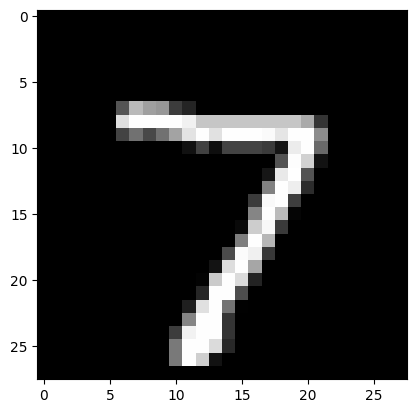

In [6]:
# Grab an individual feature and predict its label
image_7 = x_test[0]
plt.imshow(image_7.reshape(28,28), cmap = 'gray') # Displaying the image in greyscale

prediction = model.predict(image_7.reshape(1,784)) # Prediction for the very first feature in x_test

print(f" predicting a seven: \n{prediction}")

In [7]:
# Change to probability using softmax
prediction_p = tf.nn.softmax(prediction)
print(f" predicting a seven. Probability vector: \n{prediction_p}")
print(f"Total of predictions: {np.sum(prediction_p):0.3f}") #Add all the values together for prediction_p

 predicting a seven. Probability vector: 
[[9.2803747e-09 2.5749245e-09 9.5699636e-07 6.3859718e-03 1.7543960e-09
  3.8982839e-10 3.9054274e-18 9.9357313e-01 6.1680907e-06 3.3797976e-05]]
Total of predictions: 1.000


In [8]:
# Integer representation

t = np.argmax(prediction_p) # Selecting the label that has the largest value
print(f"The model is predicting a {t}.")

The model is predicting a 7.


#Model evaluation

In [9]:

test_loss, test_acc = model.evaluate(x_test, y_test) # evaluating model using the testing data

# Printing the results
print(f"The model accuracy is {test_acc*100:.2f}%")
print(f"The model loss is {test_loss:.4f}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9492 - loss: 0.1775
The model accuracy is 95.66%
The model loss is 0.1456


#Confusion Matrix

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


Text(0.5, 80.7222222222222, 'Predicted label')

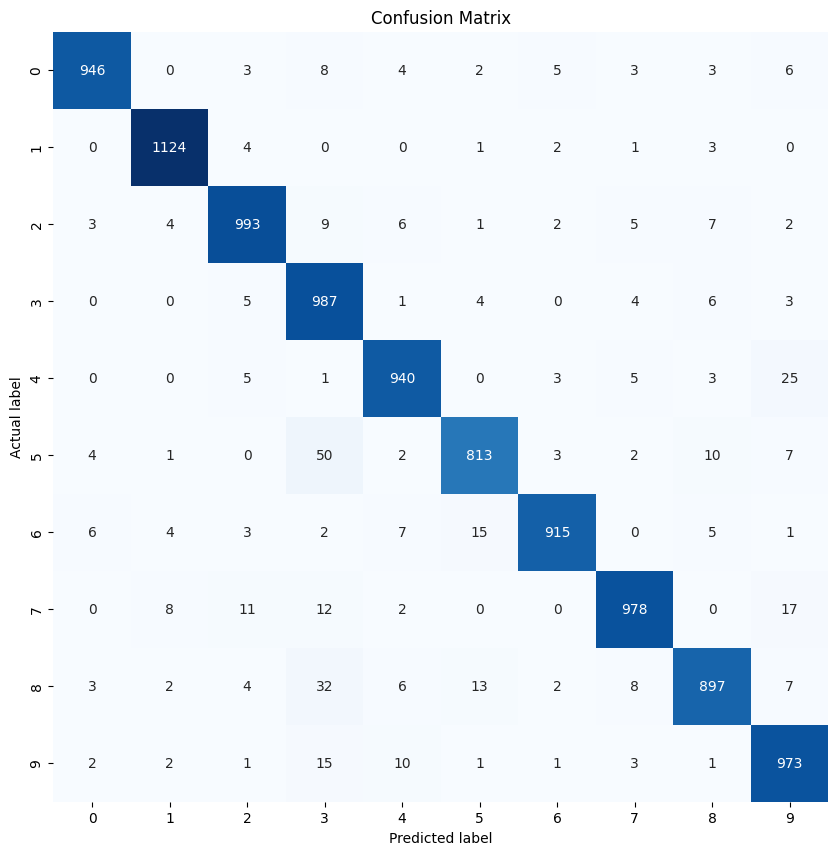

In [10]:
y_pred = model.predict(x_test) # Predicting label vector
y_pred = np.argmax(y_pred, axis=1) #Prediciting individual label from the values

cmax = confusion_matrix(y_test, y_pred) #Creation of confusion matric
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cmax, annot=True, fmt='d', vmin=0, cmap='Blues', cbar=False) # Plotting the confusion matrix
plt.title('Confusion Matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')